In [1]:
import pandas as pd
import os, csv
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
happy_path = "../data/2017.csv"
gini_path = "../data/gini_co_raw.csv"
gdp_path = "../data/gdp_raw.csv"

gini_data = pd.read_csv(gini_path)
happiness_data = pd.read_csv(happy_path)
gdp_data = pd.read_csv(gdp_path)
gini_data = gini_data.rename(columns={"Country Name":"Country"})
gdp_data = gdp_data.rename(columns={"Country Name":"Country"})
gdp_data.head()

,Country,Country Code,Indicator Name,Indicator Code,2015,2016,2017
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1926.357336,1944.117005,1980.516177
2,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,6631.618694,6440.990242,6388.960022
3,Albania,ALB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,11334.220930,11559.300840,12020.690730
4,Andorra,AND,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN


In [3]:
gini_data["Ten Year Ave"] = gini_data.mean(axis=1)
gini_data.head()



,Country,Country Code,Indicator Name,Indicator Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Ten Year Ave
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7
3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,29.5
4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
econ_df = happiness_data.merge(gini_data[["Country","Ten Year Ave"]], on="Country")
econ_df = econ_df.merge(gdp_data[["Country","2017"]], on="Country")
econ_df = econ_df.rename(columns={"2017":"GDP per Capita"})
econ_df.to_csv("../data/econ_data_clean.csv",index=False)
econ_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Ten Year Ave,GDP per Capita
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,26.410000,60978.27750
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,27.140000,50540.81377
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,27.888889,53518.09109
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,32.866667,65006.52538
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,27.510000,45191.59402


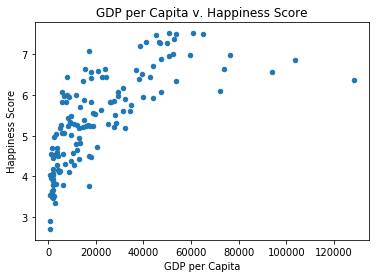

In [5]:
gdp_scatter = econ_df.plot(x="GDP per Capita", y="Happiness.Score", kind = "scatter")
plt.title("GDP per Capita v. Happiness Score")
plt.ylabel("Happiness Score")
plt.xlabel("GDP per Capita")
plt.show()

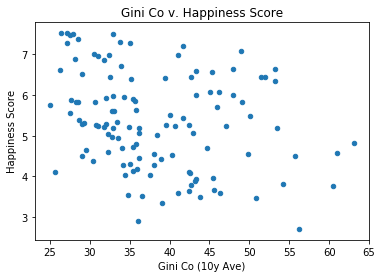

In [6]:
gini_scatter = econ_df.plot(x="Ten Year Ave", y="Happiness.Score", kind="scatter")
plt.title("Gini Co v. Happiness Score")
plt.ylabel("Happiness Score")
plt.xlabel("Gini Co (10y Ave)")
plt.show()

In [7]:
norway_df = econ_df.loc[econ_df["Country"] == "Norway"]
usa_df = econ_df.loc[econ_df["Country"] == "United States"]
car_df = econ_df.loc[econ_df["Country"] == "Central African Republic"]


us_nor_df = norway_df.append(usa_df)
three_nations_df = us_nor_df.append(car_df)
three_nations_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Ten Year Ave,GDP per Capita
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,26.41,60978.27750
13,United States,14,6.993,7.074657,6.911343,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,41.00,59531.66196
137,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,56.20,725.94542


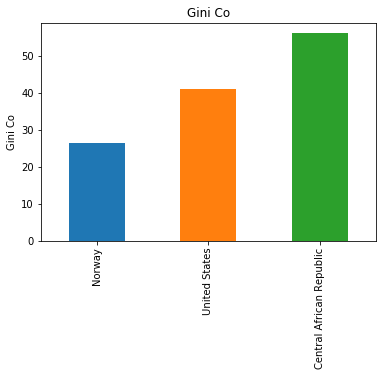

In [8]:
gini_bar = three_nations_df.plot(x="Country", y="Ten Year Ave", kind="bar",legend=False)
plt.title("Gini Co")
plt.ylabel("Gini Co")
plt.xlabel("")
plt.show()

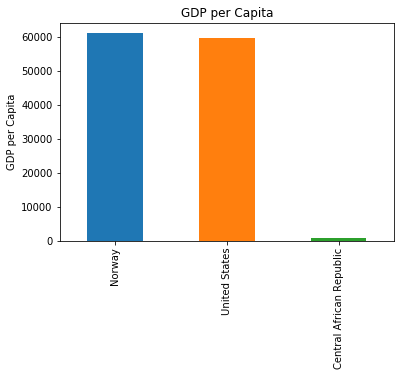

In [9]:
gdp_bar = three_nations_df.plot(x="Country", y="GDP per Capita", kind="bar",legend=False)
plt.title("GDP per Capita")
plt.ylabel("GDP per Capita")
plt.xlabel("")
plt.show()